<a href="https://colab.research.google.com/github/Yakov-Jak/ML_in_business/blob/main/2HW_Shmarin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install razdel

In [14]:
!pip install pymorphy2

     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 8.2 MB 12.9 MB/s 


In [15]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 16.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 60 kB/s 
     |████████████████████████████████| 11.3 MB 20.2 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=dd9eb276feb3763f12742b7b211b4aa8d121a4a211bfaf6ef59d5d2cb1c23900
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take int

In [ ]:
!pip uninstall numpy
!pip uninstall pandas

!pip install --user numpy
!pip install --user  pandas

Found existing installation: numpy 1.21.3
Uninstalling numpy-1.21.3:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.7
    /usr/local/lib/python3.7/dist-packages/numpy-1.21.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libgfortran-2e0d59d6.so.5.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libopenblasp-r0-2d23e62b.3.17.so
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libquadmath-2d0c479f.so.0.0.0
    /usr/local/lib/python3.7/dist-packages/numpy/*
Proceed (y/n)? y
  Successfully uninstalled numpy-1.21.3
Found existing installation: pandas 1.3.4
Uninstalling pandas-1.3.4:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pandas-1.3.4.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas/*
Proceed (y/n)? y
  Successfully uninstalled pandas-1.3.4
  Using cached numpy-1.21.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Consider adding this directory to PATH or, if yo

  Using cached pandas-1.3.4-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.


Делаем доступ к Googl Drive

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
import pandas as pd

In [8]:
path = '/gdrive/MyDrive/Colab Notebooks/2-Lesson/'

In [9]:
news = pd.read_csv(path+"articles.csv")
print(news.shape)
news.head(3)

(27000, 2)


,doc_id,title
0,6,Заместитель председателяnправительства РФnСерг...
1,4896,Матч 1/16 финала Кубка России по футболу был п...
2,4897,Форвард «Авангарда» Томаш Заборский прокоммент...


Загрузим пользователей и списки последних прочитанных новостей

In [10]:
users = pd.read_csv(path+"users_articles.csv")
users.head(3)

,uid,articles
0,u105138,"[293672, 293328, 293001, 293622, 293126, 1852]"
1,u108690,"[3405, 1739, 2972, 1158, 1599, 322665]"
2,u108339,"[1845, 2009, 2356, 1424, 2939, 323389]"


Итак, нам нужно получить векторные представления пользователей на основе прочитанным ими новостей и самих новостей

### 1. Получаем векторные представления новостей

In [11]:
#from gensim.test.utils import common_texts
# https://webdevblog.ru/gensim-rukovodstvo-dlya-nachinajushhih/
from gensim.corpora.dictionary import Dictionary

In [16]:
#предобработка текстов
import re
import numpy as np
from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize

from razdel import tokenize # https://github.com/natasha/razdel
#!pip install razdel

import pymorphy2  # pip install pymorphy2

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
stopword_ru = stopwords.words('russian')
len(stopword_ru)

morph = pymorphy2.MorphAnalyzer(  )

In [19]:
len(stopword_ru)

151

In [20]:
with open(path+'stopwords.txt') as f:
    additional_stopwords = [w.strip() for w in f.readlines() if w]
stopword_ru += additional_stopwords
len(stopword_ru)

776

In [21]:
stopword_ru[0]

'и'

In [22]:
def clean_text(text):
    '''
    очистка текста
    
    на выходе очищеный текст
    
    '''
    if not isinstance(text, str):
        text = str(text)
    
    text = text.lower()
    text = text.strip('\n').strip('\r').strip('\t')
    text = re.sub("-\s\r\n\|-\s\r\n|\r\n", '', str(text))

    text = re.sub("[0-9]|[-—.,:;_%©«»?*!@#№$^•·&()]|[+=]|[[]|[]]|[/]|", '', text)
    text = re.sub(r"\r\n\t|\n|\\s|\r\t|\\n", ' ', text)
    text = re.sub(r'[\xad]|[\s+]', ' ', text.strip())
    text = re.sub("n", ' ', text)

    
    #tokens = list(tokenize(text))
    #words = [_.text for _ in tokens]
    #words = [w for w in words if w not in stopword_ru]
    
    #return " ".join(words)
    return text

cache = {}

def lemmatization(text):
    '''
    лемматизация
        [0] если зашел тип не `str` делаем его `str`
        [1] токенизация предложения через razdel
        [2] проверка есть ли в начале слова '-'
        [3] проверка токена с одного символа
        [4] проверка есть ли данное слово в кэше
        [5] лемматизация слова
        [6] проверка на стоп-слова

    на выходе лист отлемматизированых токенов
    '''

    # [0]
    if not isinstance(text, str):
        text = str(text)
    
    # [1]
    tokens = list(tokenize(text))
    #print(tokens)
    words = [_.text for _ in tokens]

    words_lem = []
    for w in words:
        if w[0] == '-': # [2]
            w = w[1:]
        if len(w)>1: # [3]
            if w in cache: # [4]
                words_lem.append(cache[w])
                #print(temp_cach)
            else: # [5]
                temp_cach = cache[w] = morph.parse(w)[0].normal_form
                words_lem.append(temp_cach)
                #print(w,' : ',temp_cach)
    
    words_lem_without_stopwords=[i for i in words_lem if not i in stopword_ru] # [6]
    #print(words_lem_without_stopwords)
    return words_lem_without_stopwords

In [27]:
list(tokenize(news.iloc[0,1][:100],   ))

[Substring(0, 11, 'Заместитель'),
 Substring(12, 24, 'председателя'),
 Substring(24, 25, 'n'),
 Substring(25, 38, 'правительства'),
 Substring(39, 41, 'РФ'),
 Substring(41, 42, 'n'),
 Substring(42, 48, 'Сергей'),
 Substring(48, 49, 'n'),
 Substring(49, 55, 'Иванов'),
 Substring(55, 56, 'n'),
 Substring(56, 62, 'избран'),
 Substring(63, 76, 'председателем'),
 Substring(77, 83, 'совета'),
 Substring(83, 84, 'n'),
 Substring(84, 87, 'ПБК'),
 Substring(88, 92, 'ЦСКА'),
 Substring(92, 93, 'n'),
 Substring(93, 94, '.'),
 Substring(95, 98, 'Как'),
 Substring(99, 100, 'с')]

In [39]:
norm_text = news.iloc[:2,1].apply(lambda x: clean_text(x), 1)
norm_text

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Possible nested set at position 39
  from ipykernel import kernelapp as app


0    заместитель председателя правительства рф серг...
1    матч  финала кубка россии по футболу был приос...
Name: title, dtype: object

In [40]:
lemmatization(norm_text[0])

['заместитель',
 'председатель',
 'правительство',
 'рф',
 'сергей',
 'иванов',
 'избрать',
 'председатель',
 'совет',
 'пбк',
 'цска',
 'прессслужба',
 'армеец',
 'решение',
 'единогласно',
 'принять',
 'первый',
 'заседание',
 'совет',
 'клуб',
 'основной',
 'функция',
 'орган',
 'обсуждение',
 'текущий',
 'состояние',
 'планирование',
 'утверждение',
 'стратегия',
 'развитие',
 'клуб',
 'близкий',
 'перспектива',
 'состав',
 'совет',
 'войти',
 'георгий',
 'полтавченко',
 'полномочный',
 'центральный',
 'федеральный',
 'округ',
 'алексей',
 'седов',
 'генералполковник',
 'начальник',
 'служба',
 'защита',
 'конституционный',
 'строй',
 'борьба',
 'терроризм',
 'фсб',
 'рф',
 'александр',
 'новак',
 'заместитель',
 'министр',
 'финансы',
 'рф',
 'вячеслав',
 'полтавец',
 'заместитель',
 'генеральный',
 'директор',
 'руководитель',
 'блок',
 'взаимодействие',
 'орган',
 'власть',
 'социальный',
 'корпоративный',
 'политика',
 'гмк',
 'норильский',
 'никель',
 'леонид',
 'исакович',
 '

In [47]:
%%time
#Запускаем очистку текста. Будет долго...
news['title'] = news['title'].apply(lambda x: clean_text(x), 1)

CPU times: user 24.6 s, sys: 1.26 s, total: 25.9 s
Wall time: 25.9 s


In [48]:
%%time
#Запускаем лемматизацию текста. Будет очень долго...
news['title'] = news['title'].apply(lambda x: lemmatization(x), 1)

CPU times: user 4min 12s, sys: 544 ms, total: 4min 12s
Wall time: 4min 13s


А теперь в 3 строчки обучим нашу модель

In [49]:
#сформируем список наших текстов, разбив еще и на пробелы
texts = [t for t in news['title'].values]

# Create a corpus from a list of texts
common_dictionary = Dictionary(texts)
common_corpus = [common_dictionary.doc2bow(text) for text in texts]

Что такое common_dictionary и как он выглядит

In [62]:
common_dictionary[0]

'александр'

In [ ]:
common_dictionary.id2token

{0: 'александр',
 1: 'алексей',
 2: 'андрей',
 3: 'армеец',
 4: 'банк',
 5: 'баскетбол',
 6: 'близкий',
 7: 'блок',
 8: 'борьба',
 9: 'ватутин',
 10: 'взаимодействие',
 11: 'власть',
 12: 'войти',
 13: 'вячеслав',
 14: 'генералполковник',
 15: 'генеральный',
 16: 'георгий',
 17: 'гмк',
 18: 'директор',
 19: 'европа',
 20: 'единогласно',
 21: 'заместитель',
 22: 'заседание',
 23: 'защита',
 24: 'иванов',
 25: 'избрать',
 26: 'исакович',
 27: 'клиентский',
 28: 'клуб',
 29: 'конституционный',
 30: 'корпоративный',
 31: 'леонид',
 32: 'лопат',
 33: 'министр',
 34: 'мир',
 35: 'начальник',
 36: 'никель',
 37: 'новак',
 38: 'норильский',
 39: 'оао',
 40: 'обсуждение',
 41: 'округ',
 42: 'ольга',
 43: 'ооо',
 44: 'орган',
 45: 'основной',
 46: 'пбк',
 47: 'первый',
 48: 'перспектива',
 49: 'планирование',
 50: 'плешаков',
 51: 'политика',
 52: 'полномочный',
 53: 'полтавец',
 54: 'полтавченко',
 55: 'правительство',
 56: 'правление',
 57: 'председатель',
 58: 'прессслужба',
 59: 'принять',
 

Делаем BoW по списку слов

In [65]:
common_dictionary.doc2bow(['александр' ,'баскетбол' ,'баскетбол' ,'правительство', 'рф'], allow_update=True)

[(0, 1), (5, 2), (55, 1), (66, 1)]

In [66]:
common_corpus[0][0]

(0, 2)

In [70]:
len(texts[3])

81

Все просто - это словарь наших слов

Запускаем обучение

In [72]:
N_topic = 20 # число тем - гиперпараметр

In [73]:
%%time
from gensim.models import LdaModel
# Train the model on the corpus.
lda = LdaModel(common_corpus, num_topics=N_topic, id2word=common_dictionary)#, passes=10)

CPU times: user 46.8 s, sys: 21.9 s, total: 1min 8s
Wall time: 44.3 s


In [74]:
from gensim.test.utils import datapath
# Save model to disk.
temp_file = datapath("model.lda")
lda.save(temp_file)

# Load a potentially pretrained model from disk.
lda = LdaModel.load(temp_file)

Обучили модель. Теперь 2 вопроса:

1. как выглядят наши темы
2. как получить для документа вектор значений (вероятности принадлежности каждой теме)

In [ ]:
# Create a new corpus, made of previously unseen documents.
other_texts = [t for t in news['title'].iloc[:3]]
other_corpus = [common_dictionary.doc2bow(text) for text in other_texts]

unseen_doc = other_corpus[2]
print(other_texts[2])
lda[unseen_doc] 

['форвард', 'авангард', 'томаш', 'заборский', 'прокомментировать', 'игра', 'команда', 'матч', 'чемпионат', 'кхл', 'против', 'атланта', 'плохой', 'матч', 'нижний', 'новгород', 'против', 'торпедо', 'настраиваться', 'первый', 'минута', 'включиться', 'заборский', 'получиться', 'забросить', 'быстрый', 'гол', 'задать', 'хороший', 'темп', 'поединок', 'играть', 'хороший', 'сторона', 'пять', 'очко', 'выезд', 'девять', 'хороший']


[(3, 0.03991952), (12, 0.5503195), (13, 0.3481757), (16, 0.04158533)]

In [75]:
x=lda.show_topics(num_topics=N_topic, num_words=15,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

#Below Code Prints Only Words 
for topic,words in topics_words:
    print("topic_{}: ".format(topic)+" ".join(words))

topic_0: россия военный сша новый система проект экономика рынок космический российский станция наука развитие рост объём
topic_1: всё большой очень хороший например первый животное возраст век продукция товар каждый больший день поэтому
topic_2: рубль банк тыс погибнуть руб сотрудник население статья рф источник размер санкция млн россия служба
topic_3: самолёт ракета полёт корабль нефть спутник орбита аппарат российский двигатель авиакомпания топливо баррель американский система
topic_4: ребёнок гражданин обнаружить ru газета поверхность помощь область москва врач территория участок лицо центр лечение
topic_5: исследователь смерть писать испытание захватить берег производить выдать доклад необычный летать резерв вино восстановить эксперт
topic_6: пациент обращение px японский нафтогаз япония треть южный польша проживать экипаж остров adce нанести tervertical
topic_7: газ температура взрыв земля рак научный млрд восток фестиваль составить около млн телескоп место погода
topic_8: росси

Очень неплохо - большинство тем вполне можно описать о чем они


построим темы 

In [76]:
news['title'].iloc[0]

['заместитель',
 'председатель',
 'правительство',
 'рф',
 'сергей',
 'иванов',
 'избрать',
 'председатель',
 'совет',
 'пбк',
 'цска',
 'прессслужба',
 'армеец',
 'решение',
 'единогласно',
 'принять',
 'первый',
 'заседание',
 'совет',
 'клуб',
 'основной',
 'функция',
 'орган',
 'обсуждение',
 'текущий',
 'состояние',
 'планирование',
 'утверждение',
 'стратегия',
 'развитие',
 'клуб',
 'близкий',
 'перспектива',
 'состав',
 'совет',
 'войти',
 'георгий',
 'полтавченко',
 'полномочный',
 'центральный',
 'федеральный',
 'округ',
 'алексей',
 'седов',
 'генералполковник',
 'начальник',
 'служба',
 'защита',
 'конституционный',
 'строй',
 'борьба',
 'терроризм',
 'фсб',
 'рф',
 'александр',
 'новак',
 'заместитель',
 'министр',
 'финансы',
 'рф',
 'вячеслав',
 'полтавец',
 'заместитель',
 'генеральный',
 'директор',
 'руководитель',
 'блок',
 'взаимодействие',
 'орган',
 'власть',
 'социальный',
 'корпоративный',
 'политика',
 'гмк',
 'норильский',
 'никель',
 'леонид',
 'исакович',
 '

In [78]:
lda[common_dictionary.doc2bow(news['title'].iloc[0])]

[(2, 0.4925577),
 (5, 0.034250446),
 (12, 0.025827294),
 (14, 0.19951452),
 (18, 0.24127112)]

Давайте напишем функцию, которая будет нам возвращать векторное представление новости

In [79]:
#text = news['title'].iloc[0]

def get_lda_vector(text):
    unseen_doc = common_dictionary.doc2bow(text)
    lda_tuple = lda[unseen_doc]
    not_null_topics = dict(zip([i[0] for i in lda_tuple], [i[1] for i in lda_tuple]))

    output_vector = []
    for i in range(N_topic):
        if i not in not_null_topics:
            output_vector.append(0)
        else:
            output_vector.append(not_null_topics[i])
    return np.array(output_vector)

In [81]:
topic_matrix = pd.DataFrame([get_lda_vector(text) for text in news['title'].values])
topic_matrix.columns = ['topic_{}'.format(i) for i in range(N_topic)]
topic_matrix['doc_id'] = news['doc_id'].values
topic_matrix = topic_matrix[['doc_id']+['topic_{}'.format(i) for i in range(N_topic)]]
topic_matrix.head(5)

,doc_id,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,6,0.0,0.000000,0.49255,0.0,0.000000,0.034208,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.025846,0.000000,0.199524,0.00000,0.000000,0.0,0.241293,0.000000
1,4896,0.0,0.000000,0.00000,0.0,0.135949,0.000000,0.16074,0.682579,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000
2,4897,0.0,0.438277,0.00000,0.0,0.281591,0.000000,0.00000,0.090062,0.000000,0.124023,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.047297,0.0,0.000000,0.000000
3,4898,0.0,0.557516,0.00000,0.0,0.000000,0.000000,0.00000,0.000000,0.079718,0.000000,0.074788,0.0,0.000000,0.213018,0.000000,0.04872,0.000000,0.0,0.000000,0.017704
4,4899,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.164824,0.00000,0.000000,0.0,0.810852,0.000000


Прекрасно, мы получили вектора наших новостей! И даже умеем интерпретировать получившиеся темы.

Можно двигаться далее

### Следующий шаг - векторные представления пользователей

In [ ]:
users.head(10)

,uid,articles
0,u105138,"[293672, 293328, 293001, 293622, 293126, 1852]"
1,u108690,"[3405, 1739, 2972, 1158, 1599, 322665]"
2,u108339,"[1845, 2009, 2356, 1424, 2939, 323389]"
3,u101138,"[5933, 6186, 5055, 6977, 5206, 488389]"
4,u108248,"[707, 1144, 2532, 2928, 3133, 324592]"
5,u106662,"[323868, 323426, 324267, 322426, 324104, 1550]"
6,u105949,"[293138, 294471, 295012, 294736, 293949, 3544]"
7,u102457,"[6928, 5009, 6940, 7629, 7644, 512736]"
8,u104124,"[322838, 324699, 322991, 322120, 324327, 472331]"
9,u101386,"[7827, 6427, 7394, 7151, 6335, 487254]"


In [82]:
doc_dict = dict(zip(topic_matrix['doc_id'].values, topic_matrix[['topic_{}'.format(i) for i in range(N_topic)]].values))

In [83]:
doc_dict[293672]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04811385, 0.        , 0.33273113, 0.18270007, 0.        ,
       0.10927661, 0.        , 0.        , 0.        , 0.        ,
       0.1757881 , 0.        , 0.        , 0.        , 0.13739026])

In [233]:
def get_user_embedding(user_articles_list):
    user_articles_list = eval(user_articles_list)
    user_vector = np.array([doc_dict[doc_id] for doc_id in user_articles_list])
    #print(user_vector)
    user_vector1 = np.max(user_vector, 0)  # заменили на медиану, 
    return user_vector1 #,user_vector

In [103]:
# Для понимания работы функцИИ GET_USER_EMBEDDING
usat = eval(users['articles'].iloc[0])
us_vec = np.array([doc_dict[doc_id] for doc_id in usat])
np.max(us_vec, 0)

array([0.07237289, 0.01802991, 0.19001035, 0.01554401, 0.28986856,
       0.04811385, 0.        , 0.42219955, 0.22484572, 0.12494306,
       0.10927661, 0.38299909, 0.13040729, 0.18588926, 0.01933428,
       0.1757881 , 0.15401937, 0.05381902, 0.19268808, 0.37267384])

In [106]:
import matplotlib.pyplot as plt

Интересовался новостями с топиками topic_3, topic_14 (что-то про политику и государство)

In [108]:
users['articles'].iloc[0]

'[293672, 293328, 293001, 293622, 293126, 1852]'

In [ ]:
#" ".join(news[news['doc_id']==323186]['title'].iloc[0])

Теперь получим эмбединги для всех пользователей и проверим их качество на конкретной downstream-задаче

In [234]:
user_embeddings = pd.DataFrame([i for i in users['articles'].apply(lambda x: get_user_embedding(x), 1)])
user_embeddings.columns = ['topic_{}'.format(i) for i in range(N_topic)]
user_embeddings['uid'] = users['uid'].values
user_embeddings = user_embeddings[['uid']+['topic_{}'.format(i) for i in range(N_topic)]]
user_embeddings.head(3)

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,u105138,0.072373,0.018030,0.190010,0.015544,0.289869,0.048114,0.000000,0.422200,0.224846,0.124943,0.109277,0.382999,0.130407,0.185889,0.019334,0.175788,0.154019,0.053819,0.192688,0.372674
1,u108690,0.109057,0.086586,0.361848,0.346954,0.275419,0.035287,0.000000,0.098516,0.337376,0.038073,0.153141,0.157588,0.077911,0.024346,0.099422,0.016085,0.157998,0.062808,0.235729,0.113155
2,u108339,0.120121,0.000000,0.439112,0.000000,0.212756,0.029905,0.071214,0.325240,0.098406,0.032345,0.109078,0.274834,0.117009,0.000000,0.057504,0.025327,0.112708,0.000000,0.206716,0.541094


Датасет готов - можно попробовать обучить модель. Загрузим нашу разметку

In [110]:
target = pd.read_csv(path+"users_churn.csv")
target.head(3)

,uid,churn
0,u107120,0
1,u102277,0
2,u102444,0


In [235]:
X = pd.merge(user_embeddings, target, 'left')
X.head(3)

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,churn
0,u105138,0.072373,0.018030,0.190010,0.015544,0.289869,0.048114,0.000000,0.422200,0.224846,0.124943,0.109277,0.382999,0.130407,0.185889,0.019334,0.175788,0.154019,0.053819,0.192688,0.372674,0
1,u108690,0.109057,0.086586,0.361848,0.346954,0.275419,0.035287,0.000000,0.098516,0.337376,0.038073,0.153141,0.157588,0.077911,0.024346,0.099422,0.016085,0.157998,0.062808,0.235729,0.113155,1
2,u108339,0.120121,0.000000,0.439112,0.000000,0.212756,0.029905,0.071214,0.325240,0.098406,0.032345,0.109078,0.274834,0.117009,0.000000,0.057504,0.025327,0.112708,0.000000,0.206716,0.541094,1


In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#import itertools

import matplotlib.pyplot as plt

%matplotlib inline

In [236]:
#разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(X[['topic_{}'.format(i) for i in range(N_topic)]], 
                                                    X['churn'], random_state=0, test_size=0.25)

In [237]:
logreg = LogisticRegression(C=1.0)
#обучим наш пайплайн
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [238]:
#наши прогнозы для тестовой выборки
preds_max = logreg.predict_proba(X_test)[:, 1]
preds[:10]

array([0.17907613, 0.01811464, 0.4379154 , 0.13524749, 0.03014379,
       0.01789481, 0.08197071, 0.06872045, 0.04072274, 0.16121396])

In [117]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, classification_report, precision_recall_curve, confusion_matrix

### Рассчитаем Precision, Recall, F_score

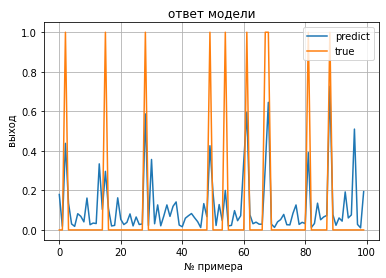

In [118]:

plt.plot( preds[:100], label = 'predict')
plt.plot(y_test.values[:100], label = 'true')
plt.title('ответ модели')
plt.xlabel(' № примера')
plt.ylabel(' выход')
plt.legend()
plt.grid('On')
plt.show()

In [239]:

precision, recall, thresholds = precision_recall_curve(y_test.values, preds_max)


In [240]:
roc_auc_score(y_test, preds_max)

0.9566346880632595

In [241]:
n=-1
fscore = (2 * precision[:n] * recall[:n]) / (precision[:n] + recall[:n])

# locate the index of the largest f score
ix = np.argmax(fscore)
metrics_max = [roc_auc, fscore[ix], precision[ix], recall[ix]]
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.353474, F-Score=0.728, Precision=0.760, Recall=0.698


In [215]:
metrics_mean.insert(0, 'Mean')
metrics_med.insert(0, 'Median')
metrics_max.insert(0, 'Max')

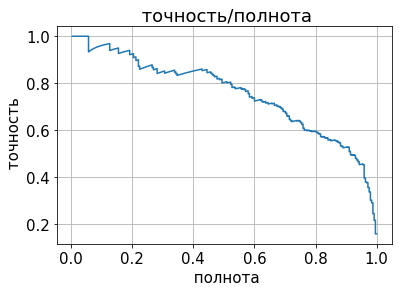

In [191]:
plt.plot(recall[:n],precision[:n] )
plt.title(' точность/полнота')
plt.xlabel(' полнота')
plt.ylabel(' точность')
plt.grid('On')
plt.show()

In [193]:
from tabulate import tabulate

In [242]:
table=[metrics_max, metrics_mean, metrics_med]
headers=["Type", "Roc_auc","F-score", "Precision","Recall"]
print(tabulate(table, headers, tablefmt="grid"))

+--------+-----------+-----------+-------------+----------+
| Type   |   Roc_auc |   F-score |   Precision |   Recall |
+========+===========+===========+=============+==========+
| Max    |  0.953288 |  0.72766  |    0.76     | 0.697959 |
+--------+-----------+-----------+-------------+----------+
| Mean   |  0.945115 |  0.671256 |    0.580357 | 0.795918 |
+--------+-----------+-----------+-------------+----------+
| Median |  0.964044 |  0.726644 |    0.630631 | 0.857143 |
+--------+-----------+-----------+-------------+----------+


Можно посмотреть, что так оно и было